##**SHETH L.U.J. & SIR M.V. COLLEGE**

####Aayush D. Yadav | T123

###**Practical No. 06**

**Aim:** Regression and Its Types
* Implement simple linear regression using a dataset.
* Explore and interpret the regression model coefficients and goodness-of-fit measures.
* Extend the analysis to multiple linear regression and assess the impact of additional predictors.


### **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

### **Get dataset**

In [2]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **Describe data**

In [3]:
# Describe the dataset to understand the statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### **Data distribution**

We will look at the distribution of the target variable, **EstimatedSalary**.

/tmp/ipython-input-3649477006.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])


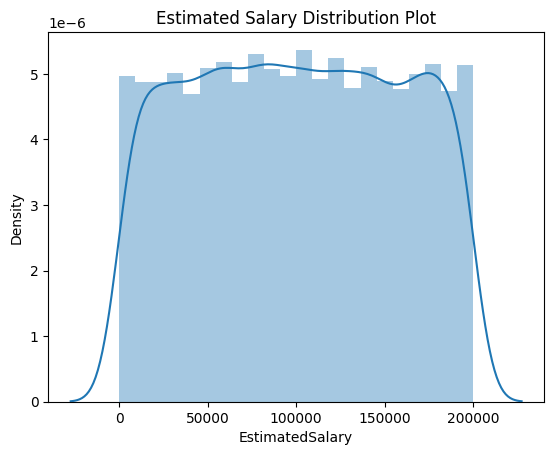

In [4]:
plt.title('Estimated Salary Distribution Plot')
sns.distplot(df['EstimatedSalary'])
plt.show()

### **Relationship between Age and Estimated Salary**

We visualize the relationship between our independent variable (**Age**) and dependent variable (**EstimatedSalary**).

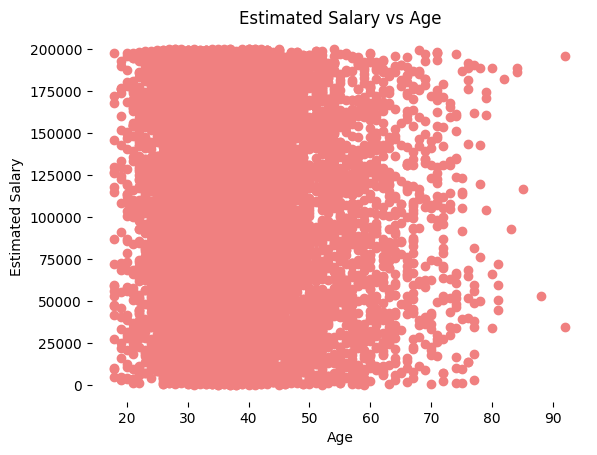

In [5]:
plt.scatter(df['Age'], df['EstimatedSalary'], color = 'lightcoral')
plt.title('Estimated Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.box(False)
plt.show()

### **Splitting variables**

We select **Age** as the independent variable (X) and **EstimatedSalary** as the dependent variable (y).

In [6]:
# Splitting variables
# Age is at index 6, EstimatedSalary is at index 12
X = df.iloc[:, 6:7]  # independent variable (Age)
y = df.iloc[:, 12:13]  # dependent variable (EstimatedSalary)

### **Splitting dataset into test/train**

In [7]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Regressor model**

In [8]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### **Prediction result**

In [9]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

### **Prediction on training set**

Visualizing the regression line on the training data.

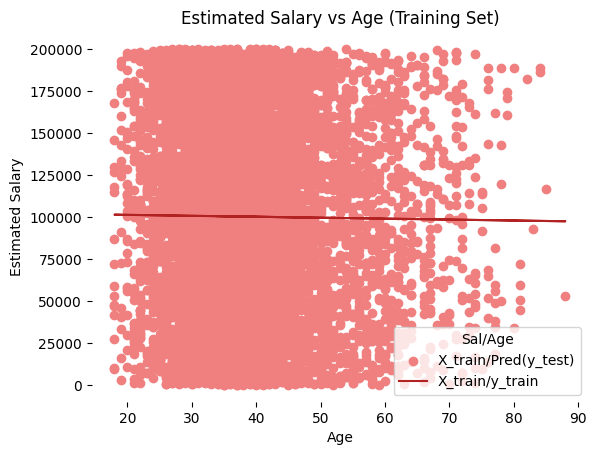

In [10]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Estimated Salary vs Age (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Age', loc='best', facecolor='white')
plt.box(False)
plt.show()

### **Prediction on test set**

Visualizing the regression line on the test data.

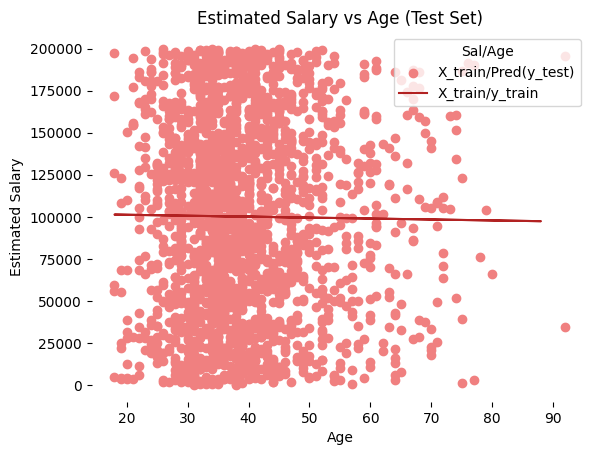

In [11]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Estimated Salary vs Age (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Age', loc='best', facecolor='white')
plt.box(False)
plt.show()

### **Regressor coefficients and intercept**

In [12]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[-56.12201085]]
Intercept: [102352.88240945]


###Multiple Linear Regression

#### **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

### **Get dataset**

In [ ]:
# Get dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **Describe data**

In [ ]:
# Describe data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### **Data distribution**

/tmp/ipython-input-248538893.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])


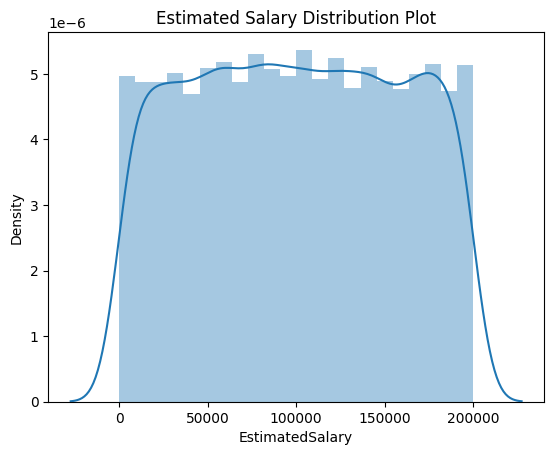

In [ ]:
# Data distribution
plt.title('Estimated Salary Distribution Plot')
sns.distplot(df['EstimatedSalary'])
plt.show()

### **Relationship between Estimated Salary and Balance**

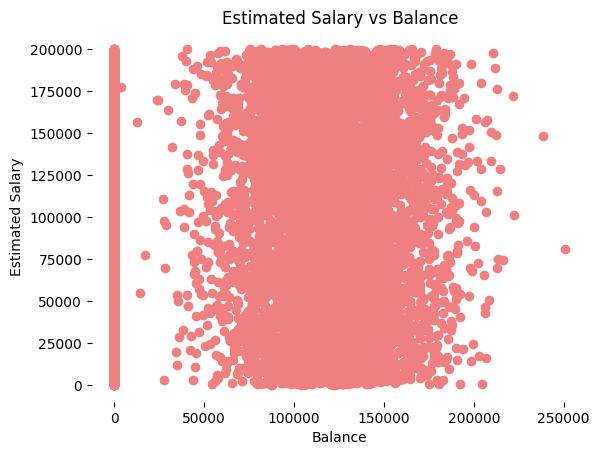

In [ ]:
# Relationship between Estimated Salary and Balance
plt.scatter(df['Balance'], df['EstimatedSalary'], color = 'lightcoral')
plt.title('Estimated Salary vs Balance')
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')
plt.box(False)
plt.show()

### **Split dataset in dependent/independent variables**

We exclude the first 3 columns (RowNumber, CustomerId, Surname) as they are identifiers. We select columns from `CreditScore` to `IsActiveMember` as our independent variables (X) and `EstimatedSalary` as our dependent variable (y).

In [ ]:
# Split dataset in dependent/independent variables
# X includes columns from index 3 (CreditScore) to 11 (IsActiveMember)
# y includes column index 12 (EstimatedSalary)
X = df.iloc[:, 3:12].values
y = df.iloc[:, 12].values

### **One-hot encoding of categorical data**

We need to encode **Geography** (index 1 in X) and **Gender** (index 2 in X).

In [ ]:
# One-hot encoding of categorical data
# Encoding Geography (index 1) and Gender (index 2)
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1, 2])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

### **Split dataset into test/train**

In [ ]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Train multiple regression model**

In [ ]:
# Train multiple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### **Predict result**

In [ ]:
# Predict result
y_pred = regressor.predict(X_test)

### **Compare predicted result with actual value**

In [ ]:
# Compare predicted result with actual value
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
print(result)

[[101632.74 192852.67]
 [ 99394.65 128702.1 ]
 [ 99141.91  75732.25]
 ...
 [ 99520.19 141533.19]
 [ 99711.87  11276.48]
 [101331.93 192950.6 ]]
